In [1]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [2]:
# Load data 
train_data = pd.read_csv('train_data.csv')
test_data  = pd.read_csv('test_data.csv')
print("Train:", train_data.shape, "| Test:", test_data.shape)

Train: (297960, 785) | Test: (74491, 785)


In [3]:
# Separate features & labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test  = test_data.drop('label', axis=1).values
y_test  = test_data['label'].values

In [4]:
# Normalize & reshape
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [5]:
# One-hot encode
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat  = to_categorical(y_test,  num_classes=26)

In [6]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)


In [7]:
# IMPROVED CNN MODEL
model_improved = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(26, activation='softmax')
])

model_improved.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_improved.summary()


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 876,154 (3.34 MB)

 Trainable params: 875,450 (3.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
# TRAINING
es = EarlyStopping(patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_improved_cnn_model.keras', save_best_only=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model_improved.fit(
    datagen.flow(X_train, y_train_cat, batch_size=128),
    validation_data=(X_test, y_test_cat),
    epochs=50,
    callbacks=[es, mc, rlr],
    verbose=2
)


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2328/2328 - 286s - 123ms/step - accuracy: 0.9257 - loss: 0.2601 - val_accuracy: 0.9845 - val_loss: 0.0561 - learning_rate: 0.0010
Epoch 2/50
2328/2328 - 275s - 118ms/step - accuracy: 0.9708 - loss: 0.1012 - val_accuracy: 0.9848 - val_loss: 0.0580 - learning_rate: 0.0010
Epoch 3/50
2328/2328 - 321s - 138ms/step - accuracy: 0.9754 - loss: 0.0870 - val_accuracy: 0.9879 - val_loss: 0.0451 - learning_rate: 0.0010
Epoch 4/50
2328/2328 - 296s - 127ms/step - accuracy: 0.9782 - loss: 0.0772 - val_accuracy: 0.9019 - val_loss: 0.3124 - learning_rate: 0.0010
Epoch 5/50
2328/2328 - 286s - 123ms/step - accuracy: 0.9799 - loss: 0.0712 - val_accuracy: 0.0307 - val_loss: 47.1972 - learning_rate: 0.0010
Epoch 6/50
2328/2328 - 293s - 126ms/step - accuracy: 0.9813 - loss: 0.0661 - val_accuracy: 0.4569 - val_loss: 3.4963 - learning_rate: 0.0010
Epoch 7/50
2328/2328 - 288s - 124ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.2965 - val_loss: 5.1561 - learning_rate: 5.0000e-04
Epoch 8/

2328/2328 - 24s - 11ms/step - accuracy: 0.9879 - loss: 0.0451

 Test Accuracy: 0.9879 | Test Loss: 0.0451
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step

 Classification Report:
              precision    recall  f1-score   support

           0     0.9830    0.9978    0.9903      2774
           1     0.9790    0.9948    0.9868      1734
           2     0.9908    0.9885    0.9896      4682
           3     0.9560    0.9655    0.9607      2027
           4     0.9960    0.9878    0.9919      2288
           5     0.9785    0.9785    0.9785       233
           6     0.9859    0.9740    0.9799      1152
           7     0.9838    0.9654    0.9745      1444
           8     0.9696    0.9955    0.9824       224
           9     0.9765    0.9788    0.9777      1699
          10     0.9701    0.9848    0.9774      1121
          11     0.9904    0.9780    0.9841      2317
          12     0.9731    0.9968    0.9848      2467
          13     0.9864    0.9892    0.9878      3802
          14 

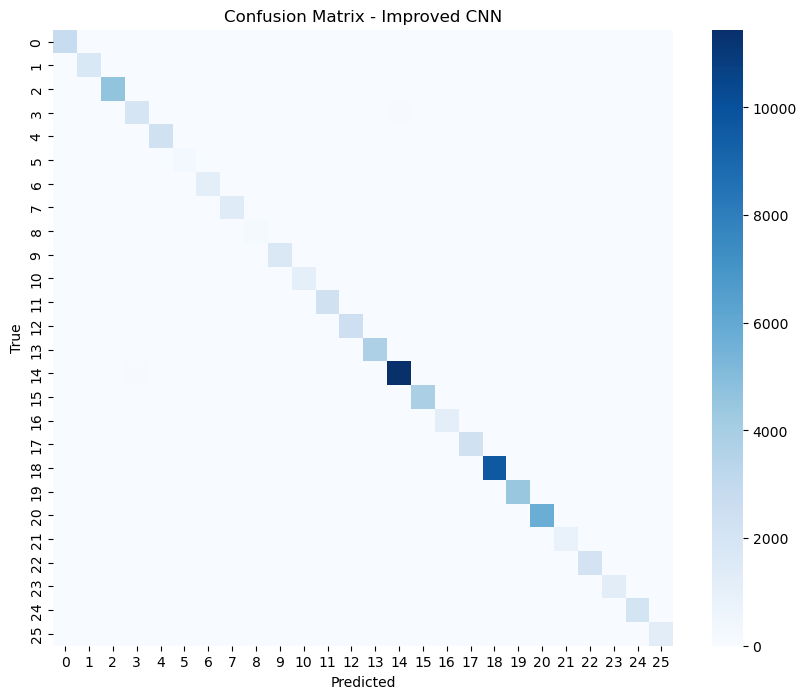

In [9]:
# EVALUATION
test_loss, test_acc = model_improved.evaluate(X_test, y_test_cat, verbose=2)
print(f"\n Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

y_pred = np.argmax(model_improved.predict(X_test), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix - Improved CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


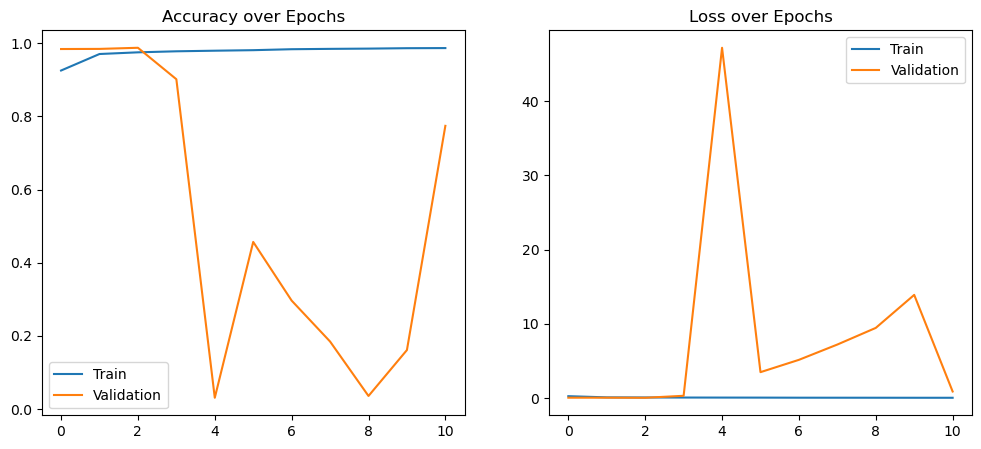

mproved CNN model training and evaluation complete.


In [10]:
# TRAINING CURVES
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

print("mproved CNN model training and evaluation complete.")
